In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

#configre environment
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"]=(12,6)

#Load Dataset
data=pd.read_excel("Online_Payment_Fraud_Detection.xlsx")

#Basic data exxploration
print("Dataset info:")
data.info()
print("\nStatistical Summary:")
print(data.describe())
print("\nColumn Types:")
print(f"Categorical: {data.select_dtypes(include='object').shape[1]}")
print(f"Integer: {data.select_dtypes(include='int').shape[1]}")
print(f"Float: {data.select_dtypes(include='float').shape[1]}")

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5000 non-null   int64  
 1   type            5000 non-null   object 
 2   amount          5000 non-null   float64
 3   nameOrg         5000 non-null   object 
 4   oldbalanceOrg   5000 non-null   float64
 5   newbalanceOrg   5000 non-null   float64
 6   nameDest        5000 non-null   object 
 7   oldbalanceDest  5000 non-null   float64
 8   newbalanceDest  5000 non-null   float64
 9   isFraud         5000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 390.8+ KB

Statistical Summary:
              step       amount  oldbalanceOrg  newbalanceOrg  oldbalanceDest  \
count  5000.000000  5000.000000    5000.000000    5000.000000     5000.000000   
mean     49.398200  4957.855448   10028.611786    7481.835510    15104.602008   
std      2

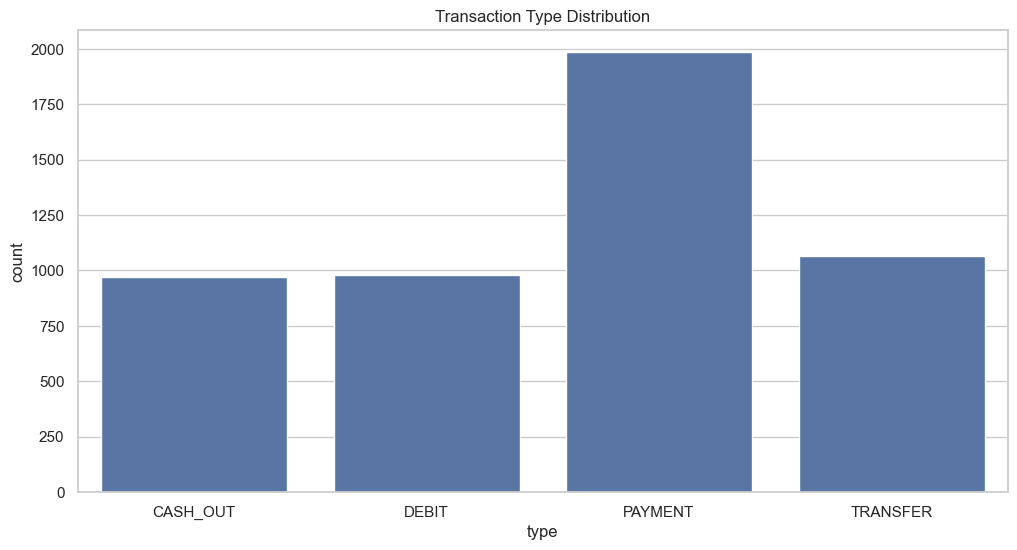

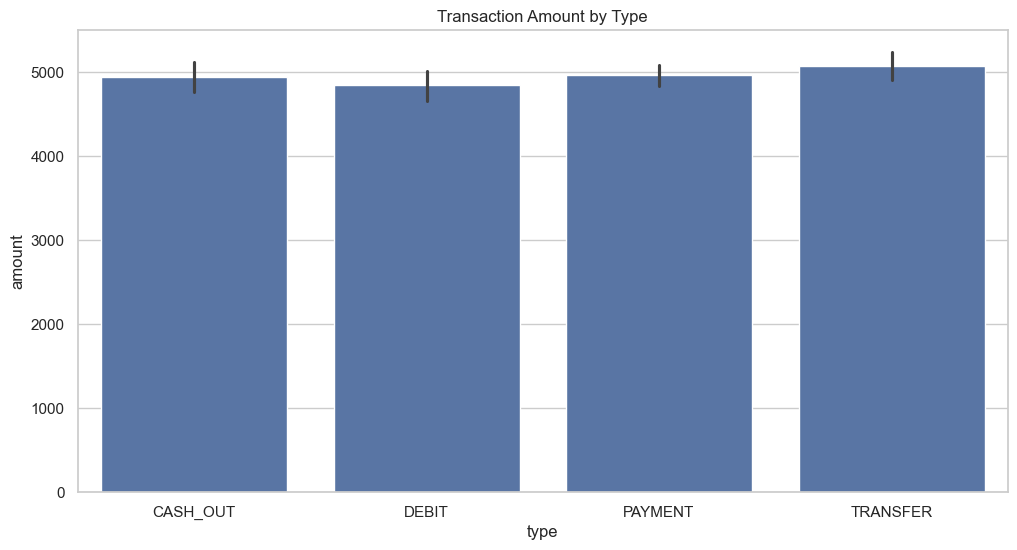

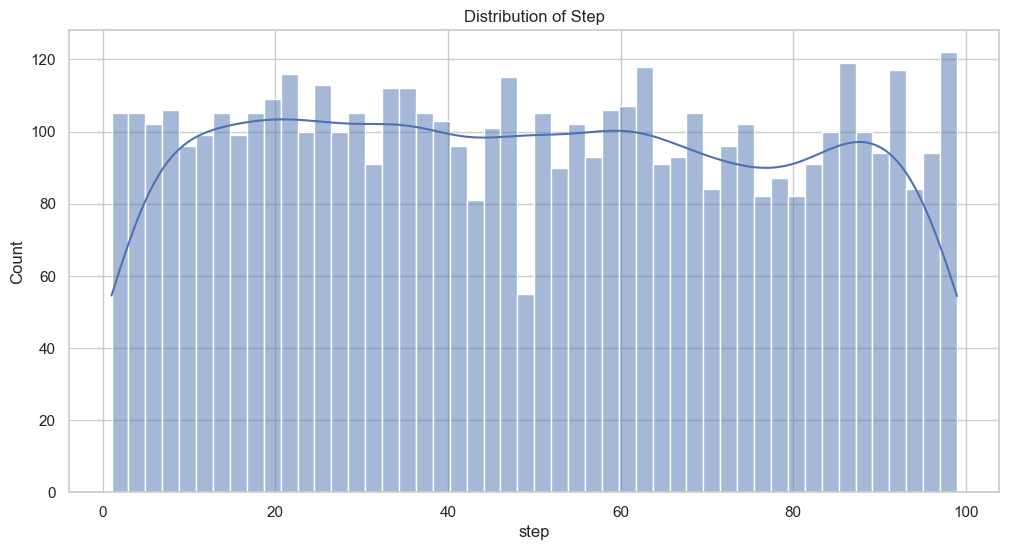

In [3]:
#Visualizations 
sns.countplot(x='type',data=data)
plt.title("Transaction Type Distribution")
plt.show()

sns.barplot(x='type',y='amount',data=data)
plt.title("Transaction Amount by Type")
plt.show()

sns.histplot(data['step'],bins=50,kde=True)
plt.title("Distribution of Step")
plt.show()

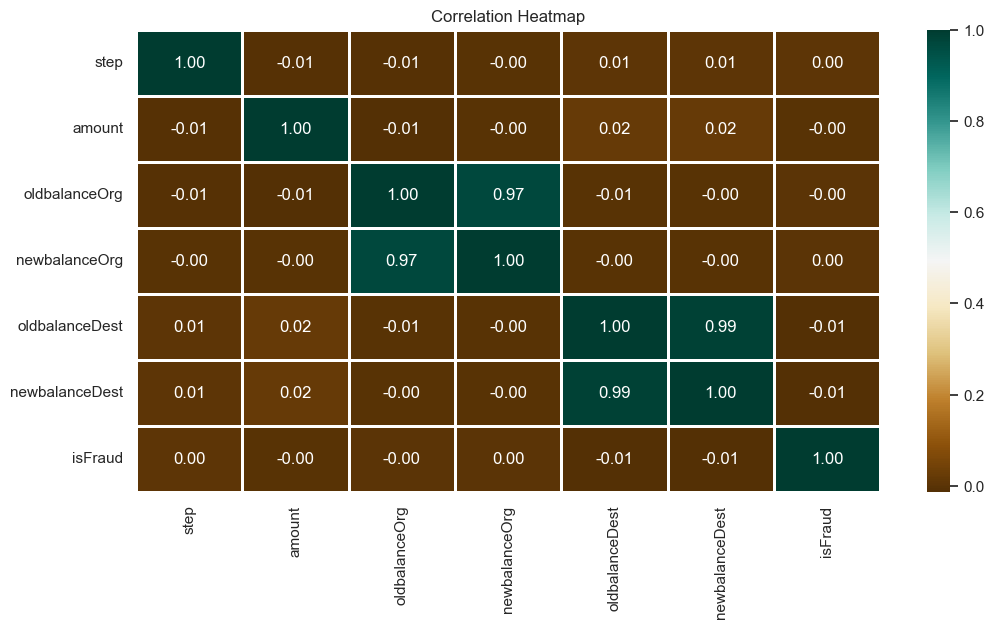

In [5]:
plt.figure(figsize=(12,6))
numeric_data=data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(),annot=True,fmt=".2f",cmap="BrBG",linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

#Feature Engineering
data=pd.concat([data,pd.get_dummies(data['type'],drop_first=True)],axis=1)

In [9]:
#Drop unnecessary columns
X=data.drop(['isFraud','type','nameOrg','nameDest'],axis=1)
y=data['isFraud']

#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f'\nTrain/Test Split: X_train={X_train.shape},X_test={X_test.shape}')


Train/Test Split: X_train=(3500, 9),X_test=(1500, 9)


In [15]:
#Define models
models={
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='rbf',probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)
}

#Evaluate models
def evaluate_model(name,model):
    model.fit(X_train,y_train)
    train_probs=model.predict_proba(X_train)[:,1]
    test_probs=model.predict_proba(X_test)[:,1]
    print(f"{name}:")
    print(f"Training AUC:{roc_auc_score(y_train,train_probs):.4f}")
    print(f"Validation AUC:{roc_auc_score(y_test,test_probs):.4f}")
    return model

In [17]:
#Run Evaluation
for name, model in models.items():
    models[name]=evaluate_model(name, model)
    print()
#Use last trained model for final predictions 
final_model=list(models.values())[-1]
y_pred=final_model.predict(X_test)

Logistic Regression:
Training AUC:0.5280
Validation AUC:0.5109

Support Vector Machine:
Training AUC:0.4542
Validation AUC:0.4897

Random Forest:
Training AUC:0.9978
Validation AUC:0.4864



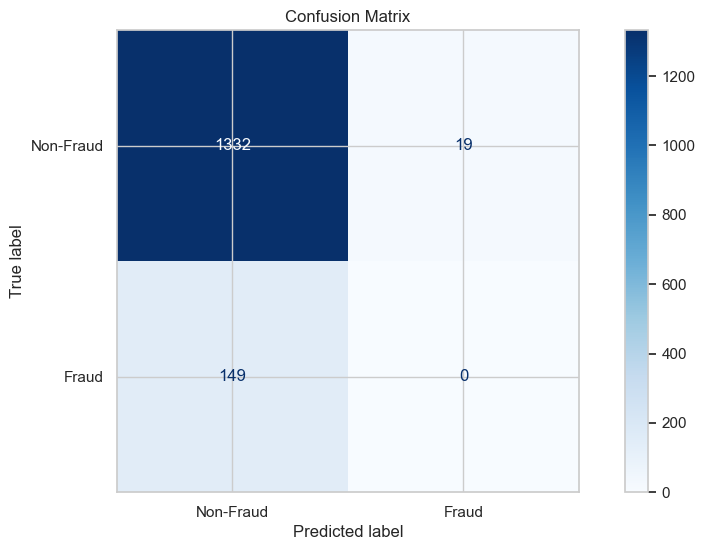

In [19]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Fraud','Fraud'])
disp.plot(cmap='Blues',values_format='d')
plt.title('Confusion Matrix')
plt.show()